#워드 클라우드

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
!pip install Konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving gift.txt to gift.txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving heart.jpg to heart.jpg


## 한글 텍스트 전처리

In [4]:
with open(textfile) as fp:
    text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [24]:
# 영문자, 숫자 제거 
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item: 
        new_tokens.append(item)

In [25]:
# 한글폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- 아래 두 과정을 반복해서 불용어를 정리

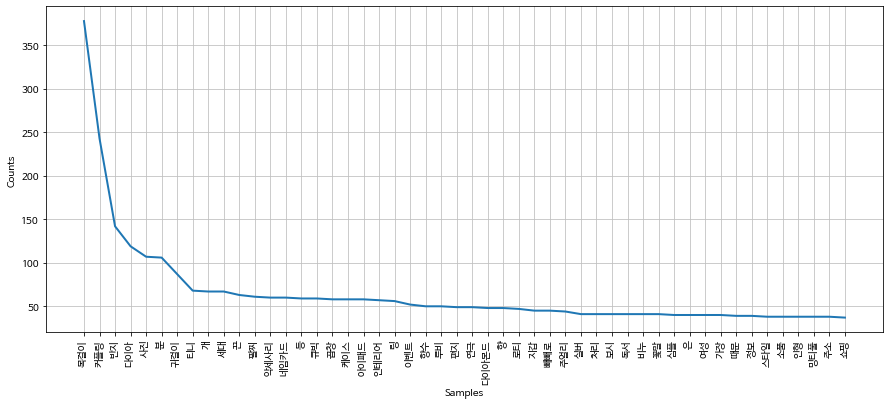

In [29]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [27]:
stoptext = """
    선물 추천 것 가격 수 기능 제품 저 제 생각 여자 여자친구 사용 요 더 꽃 구매 고급
    판매 때 참고 머리 하나 해 한번 제작 용 준 디자인 거 네이버 사람 배송 중 후기 감동
    하트 여친 커플 가능 사랑 인기 상품 직접 브랜드 선택 곳 모양 마감 요즘 오늘 가지 남녀 그냥
    처 조금 하투 하루 정도 도움 의미 변경 위 페이 마음 부담 남자 협찬 전 핸드 의미 도움 색상
    아래 처 포장 정말
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['반지', '목걸이', '가디건', '모자', '신지', '몇개', '투척', '클래식', '커플룩', '버핏']

## 워드 클라우드 그리기

In [23]:
from wordcloud import WordCloud
from PIL import Image

In [36]:
data = gift.vocab().most_common(300)
path ='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2,
               background_color='white'
).generate_from_frequencies(dict(data))

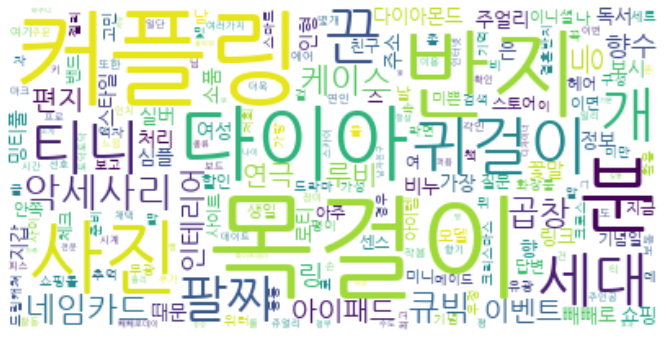

In [38]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트 그림에 표시

In [39]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [40]:
wc = WordCloud(font_path=path, relative_scaling=0.2,
               background_color='white', mask=mask,
               min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

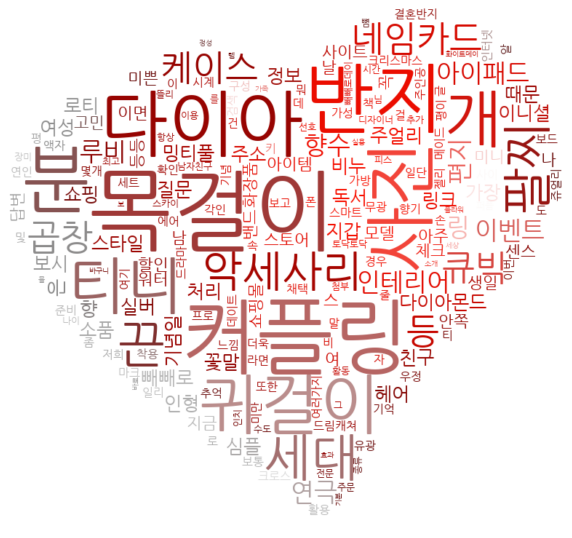

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors),
           interpolation='bilinear')
plt.axis('off')
plt.show()